In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys

In [2]:
file_date = '2019-07-18-084612'

In [3]:
print(os.getcwd())
import glob
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/SARA_LED_2000epoch/SARA/'+file_date+'/log/*.csv')
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-18-084612/log\\2019-07-18.csv',
 '../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-18-084612/log\\2019-07-19.csv',
 '../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-18-084612/log\\2019-07-20.csv']

In [4]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(66456, 4)
(104261, 4)
(29283, 4)


In [5]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [6]:

# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_raw.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'])
Agent_1_action_df.shape

(200000, 168)

In [7]:
Agent_1_action_df

actuator_name,light_node#1,light_node#2,light_node#3,light_node#4,light_node#5,light_node#6,light_node#7,light_node#8,light_node#9,light_node#10,...,sma3_node#23,sma4_node#23,sma5_node#23,sma6_node#23,sma1_node#24,sma2_node#24,sma3_node#24,sma4_node#24,sma5_node#24,sma6_node#24
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.983216,-0.219448,-0.686366,0.926058,-0.794125,0.048812,0.999401,-0.968352,-0.867842,0.711634,...,-0.517413,-0.473962,-0.814728,-0.796743,-0.970082,0.473526,-0.790996,0.631251,0.363364,0.720400
2,-0.983216,-0.219448,-0.686366,0.926058,-0.794125,0.048812,0.999401,-0.968352,-0.867842,0.711634,...,-0.517413,-0.473962,-0.814728,-0.796743,-0.970082,0.473526,-0.790996,0.631251,0.363364,0.720400
3,-0.983216,-0.219448,-0.686366,0.926058,-0.794125,0.048812,0.999401,-0.968352,-0.867842,0.711634,...,-0.517413,-0.473962,-0.814728,-0.796743,-0.970082,0.473526,-0.790996,0.631251,0.363364,0.720400
4,-0.920751,-0.562298,-0.346747,0.898158,-0.736360,0.037169,0.997572,-0.903859,-0.891635,0.262465,...,-0.546139,-0.409020,-0.961064,-0.816722,-0.950698,0.168786,-0.905894,0.608888,0.695164,0.612707
5,-0.852959,-0.764054,-0.177271,0.909321,-0.667822,0.033938,0.990989,-0.854675,-0.890325,0.085595,...,-0.580902,-0.217259,-0.957722,-0.823057,-0.917060,0.184808,-0.884994,0.463794,0.777030,0.539258
6,-0.977440,-0.176830,-0.744084,0.992931,-0.931078,-0.209038,0.998585,-0.983511,-0.723773,-0.102835,...,-0.647831,-0.362102,-0.292652,-0.509316,-0.983642,0.828164,-0.334146,-0.241639,0.653564,0.821057
7,-0.980776,-0.290533,-0.607729,0.886978,-0.705257,-0.290078,0.999082,-0.961071,-0.718686,0.650022,...,0.061581,-0.606262,-0.358770,-0.661444,-0.945637,0.478560,-0.733352,0.560407,0.285608,0.439341
8,-0.778174,-0.847452,0.008450,0.903106,-0.565187,0.191346,0.974028,-0.728358,-0.871285,-0.105062,...,-0.606435,-0.046255,-0.971094,-0.866505,-0.893639,0.105077,-0.874993,0.248483,0.847105,0.457101
9,-0.574208,-0.883715,0.433319,0.943800,-0.759719,0.365981,0.752142,-0.894059,-0.746520,-0.491062,...,-0.806611,0.450747,-0.883334,-0.915134,-0.726345,0.439103,-0.587715,-0.041701,0.753552,0.275247


c:\users\daiwei lin\appdata\local\conda\conda\envs\unity_ml\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


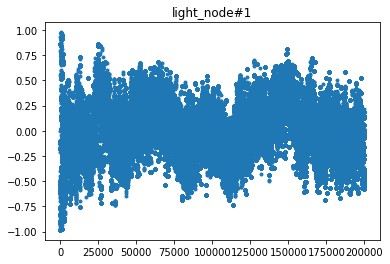

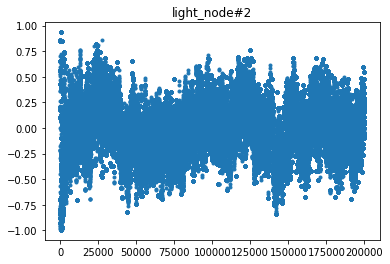

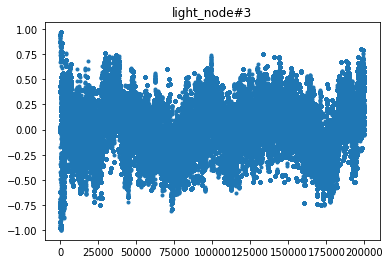

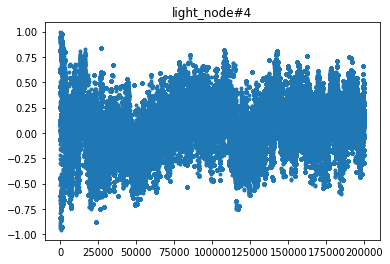

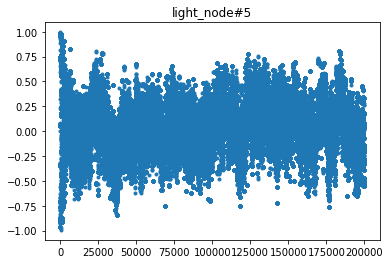

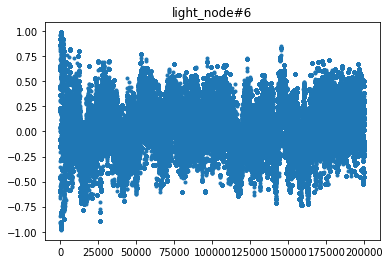

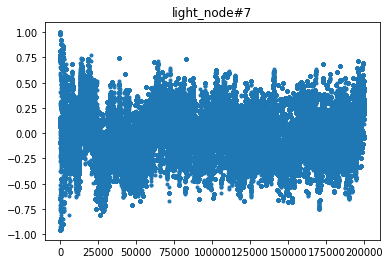

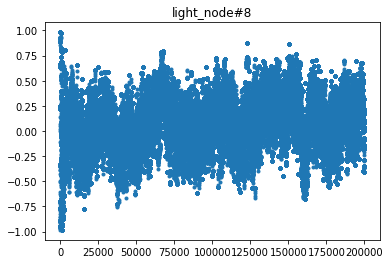

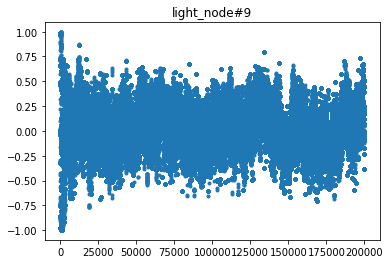

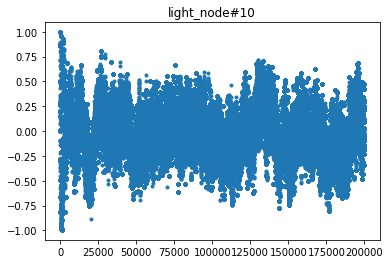

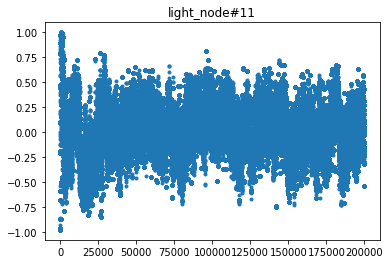

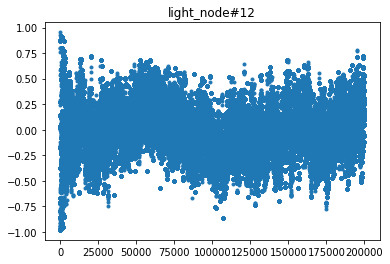

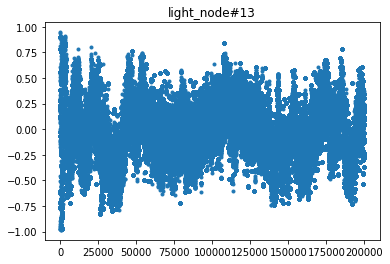

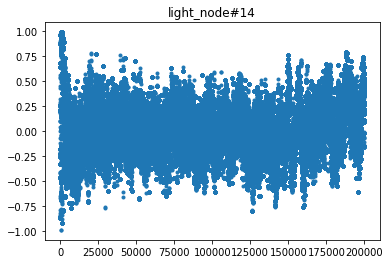

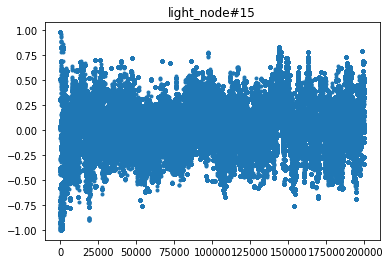

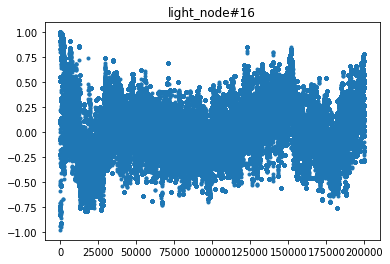

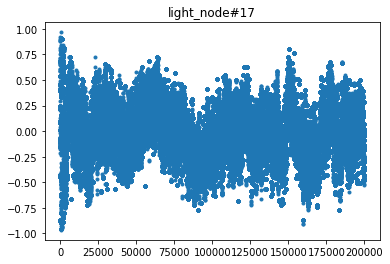

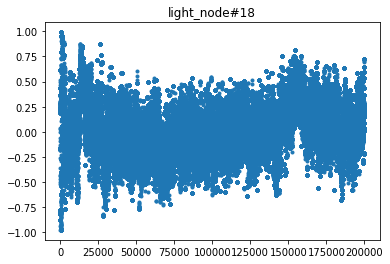

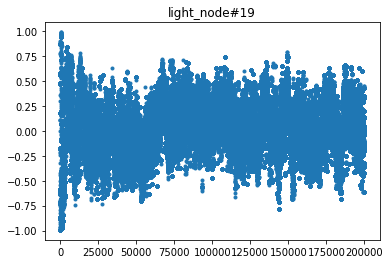

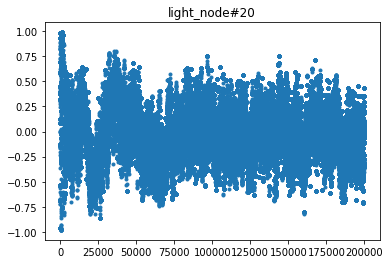

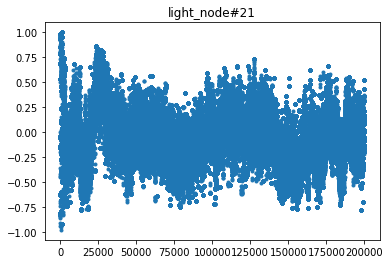

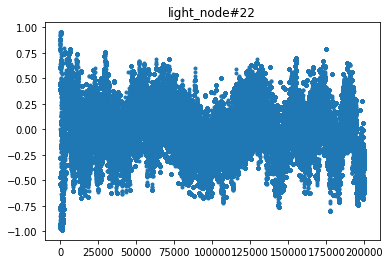

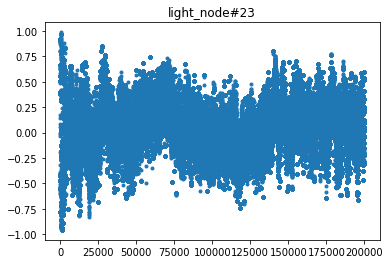

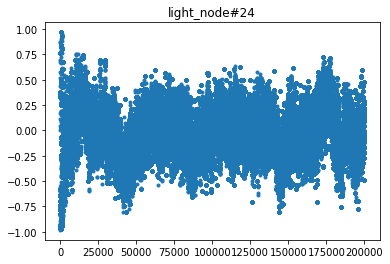

In [8]:
for i in range(24):
    plt.figure()
    col_name = 'light_node#'+str(i+1)
    plt.plot(Agent_1_action_df.index, Agent_1_action_df[col_name],'.')
    plt.title(col_name)
    

## Visitor activities

In [10]:
import re
# Process log
visitor_log_file = glob.glob("../SHARCNET/Results/SARA_LED_2000epoch/SARA/"+file_date+"/*.out")
print(visitor_log_file)
for log_file in visitor_log_file:
    f_in = open(log_file, "r")

f_out = open("../SHARCNET/Results/SARA_LED_2000epoch/SARA/"+file_date+"/visitor_log.csv","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# save into CSV
f_out.write("Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed\n")
for line in f_in:
    if line.strip():
        # not empty line    
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None:
            f_out.write(line.replace('(','').replace(')',''))
        
f_in.close()
f_out.close()

['../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-18-084612\\s_single_SARA_s_rollout_17320245ob.out']


### 1. Position

In [3]:
visitor_data = pd.read_csv("../SHARCNET/Results/SARA_LED_2000epoch/SARA/2019-07-05-195627/visitor_log.csv", sep=',')
print(visitor_data.shape)

(4900000, 9)


In [4]:
visitor_data.iloc[-2,:]

Time             99999.960000
Location_x           1.100000
Location_y           0.000000
Location_z           0.100000
Destination_x        1.100000
Destination_y        0.100000
Destination_z        0.000000
Distance             0.099548
Speed                0.000000
Name: 4899998, dtype: float64

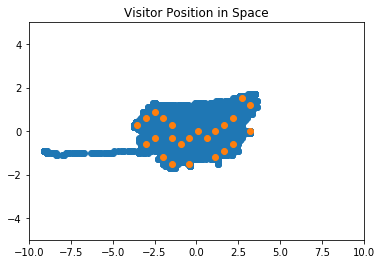

In [5]:
nodes_position = pd.read_csv("NodePosition.csv")

plt.scatter(visitor_data['Location_x'], visitor_data['Location_z'])
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.title("Visitor Position in Space")
plt.scatter(nodes_position['x'], nodes_position['z'])

In [6]:
import seaborn
def heat_map(resolution, data_x, data_z):
    bins_x = np.linspace(-10,10,resolution[0]+1)
    bins_z = np.linspace(-5,5,resolution[1]+1)
    x_discretized = pd.cut(data_x,bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    z_discretized = pd.cut(data_z,bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    activity_map = np.zeros(resolution)
    for i in range(len(x_discretized)):
        position = (x_discretized[i],z_discretized[i])
        activity_map[position] += 1
    
    ax = seaborn.heatmap(activity_map, cmap="YlGnBu")
    ax.invert_yaxis()
    return activity_map


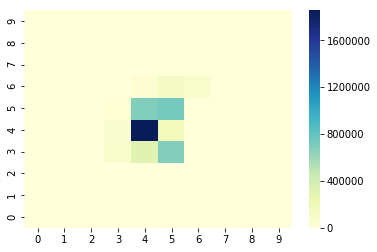

In [7]:
resolution = (10,10)
activity_map = heat_map(resolution,visitor_data['Location_x'],visitor_data['Location_z'])


### visitor's activities between 1982-2061 episode

In [48]:

total_time = visitor_data.iloc[-1,0]
period = [total_time * 1982/8000, total_time * 2061/8000]
period_data = visitor_data.loc[visitor_data['Time']>=period[0]].loc[visitor_data['Time']<=period[1]]

In [49]:
period_data.head()

,Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed
1213975,24775.02,0.0,0.1,-0.1,0.1,0.1,0.0,0.094006,0.0
1213976,24775.04,0.0,0.1,-0.1,0.1,0.1,0.0,0.094006,0.0
1213977,24775.06,0.0,0.1,-0.1,0.1,0.1,0.0,0.094006,0.0
1213978,24775.08,0.0,0.1,-0.1,0.1,0.1,0.0,0.094006,0.0
1213979,24775.10,0.0,0.0,-0.1,0.1,0.1,0.0,0.094006,0.0


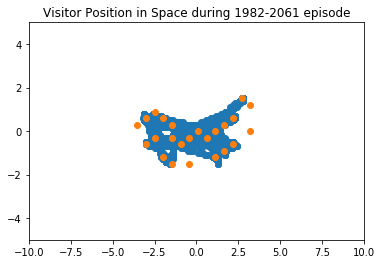

In [50]:
plt.scatter(period_data['Location_x'], period_data['Location_z'])
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.title("Visitor Position in Space during 1982-2061 episode")
plt.scatter(nodes_position['x'], nodes_position['z'])

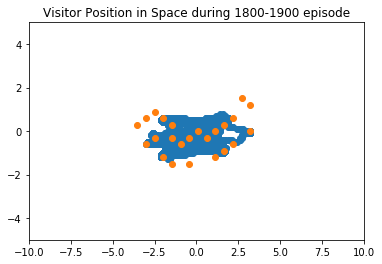

In [56]:
period = [total_time * 1800/8000, total_time * 1900/8000]
period_data = visitor_data.loc[visitor_data['Time']>=period[0]].loc[visitor_data['Time']<=period[1]]
plt.scatter(period_data['Location_x'], period_data['Location_z'])
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.title("Visitor Position in Space during 1800-1900 episode")
plt.scatter(nodes_position['x'], nodes_position['z'])

In [51]:
speed = period_data['Speed'].fillna(0)
speed.dtype
# speed = speed.replace({"Infinity":np.NaN, "-Infinity":np.NaN})
# speed = np.abs(speed.fillna(method='ffill'))
speed = np.abs(speed)
# speed

In [52]:
# filter out noise
for idx, v in speed.items():
    if v > 30:
        speed.loc[idx] = 0        

Text(0, 0.5, 'Instant Speed (m/s)')

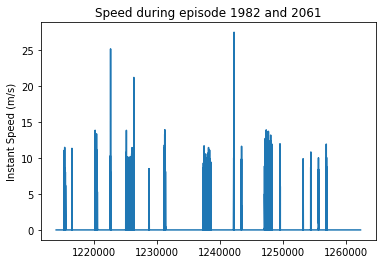

In [53]:
plt.plot(speed)
plt.title("Speed during episode 1982 and 2061")
plt.ylabel("Instant Speed (m/s)")

Text(0, 0.5, 'Instant Speed (m/s)')

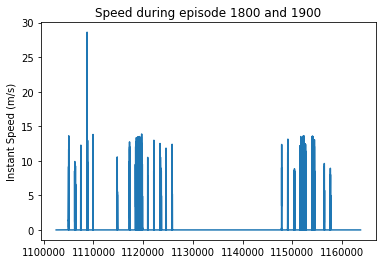

In [57]:
speed = period_data['Speed'].fillna(0)
speed.dtype
# speed = speed.replace({"Infinity":np.NaN, "-Infinity":np.NaN})
# speed = np.abs(speed.fillna(method='ffill'))
speed = np.abs(speed)
# filter out noise
for idx, v in speed.items():
    if v > 30:
        speed.loc[idx] = 0    
plt.plot(speed)
plt.title("Speed during episode 1800 and 1900")
plt.ylabel("Instant Speed (m/s)")

<font color=red>The vistor is constantly moving.</font>
***

### visitor's activities between 1800-1900 episode

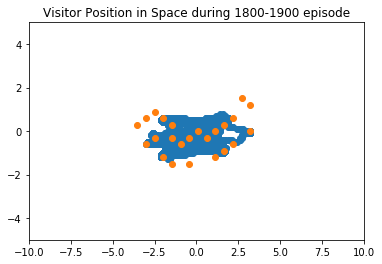

In [54]:
period = [total_time * 1800/8000, total_time * 1900/8000]
period_data = visitor_data.loc[visitor_data['Time']>=period[0]].loc[visitor_data['Time']<=period[1]]
plt.scatter(period_data['Location_x'], period_data['Location_z'])
plt.xlim([-10,10])
plt.ylim([-5,5])
plt.title("Visitor Position in Space during 1800-1900 episode")
plt.scatter(nodes_position['x'], nodes_position['z'])

Text(0, 0.5, 'Instant Speed (m/s)')

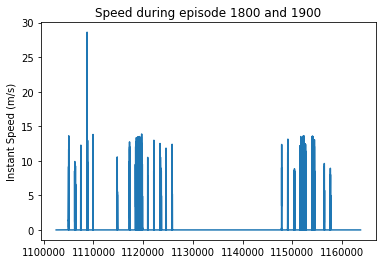

In [55]:
speed = period_data['Speed'].fillna(0)
speed.dtype
# speed = speed.replace({"Infinity":np.NaN, "-Infinity":np.NaN})
# speed = np.abs(speed.fillna(method='ffill'))
speed = np.abs(speed)
# filter out noise
for idx, v in speed.items():
    if v > 30:
        speed.loc[idx] = 0    
plt.plot(speed)
plt.title("Speed during episode 1800 and 1900")
plt.ylabel("Instant Speed (m/s)")

### 2.Vsitor speed

In [20]:
visitor_data = visitor_data.fillna(method='bfill')
visitor_data

,Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed
0,0.02,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
1,0.04,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
2,0.06,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
3,0.08,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
4,0.10,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
5,0.12,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
6,0.14,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
7,0.16,-9.1,0.0,-0.9,3.7,0.1,4.1,0,0
8,0.18,-9.1,0.1,-0.9,-1.5,0.1,-0.3,7.667956,-383.3979
9,0.20,-9.1,0.1,-0.9,-1.5,0.1,-0.3,7.666529,0.0713587
